In [1]:
import sys
import os
sys.path.append("../")
import numpy as np 
from utils import *
from lattice import *
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensornetwork as tn

In [42]:
sps = 3
bd = 2
res = []
for seed in range(0, 5000):
    parent_dir = f"../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_{seed}/1_mel_Adam/lr_0.001_epoch_10000"
    try:
        u_path, lv = path_with_lowest_loss(parent_dir, absolute_path=True)
        u = np.load(u_path + "/0.npy")
    except:
#         print(f"there are no matrix under the path = {parent_dir}")
        continue
    print(u_path)
    A = FF.block1D(bd, sps, bd, seed=seed)
    A_ = A.transpose(1,0,2)
    A_tilde = np.einsum("ijk,ilm->jlkm", A_, A_).reshape(4,4)
    sle = np.sort(np.linalg.eigvals(A_tilde))[::-1]
    print(sle.real)
    A2 = np.einsum("ijk,klm->jlim", A, A).reshape(sps**2, bd**2)
    U, s , V = np.linalg.svd(A2)
    Up = U[:, len(s):]
    h = Up @ Up.T
    max_gap = 0
    for L in range(4,5):
        H = sum_ham(h, [[i, (i + 1) % L] for i in range(L)], L, sps)
        E = np.linalg.eigvalsh(H)
        gap = E[1] - E[0]
        max_gap = max(gap, max_gap)
#         print(max_gap, seed)
    e = np.linalg.eigvalsh(h)
    h = np.load(f"../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_{seed}/1_mel_Adam/lr_0.001_epoch_10000/H/0.npy")
    U = np.kron(u,u)
    hu = U @ h @ U.T
    
    res.append({
        "seed" : seed,
        "E" : np.linalg.eigvalsh(H),
        "loss" : lv,
        "gap" : max_gap,
        "gap_loc" : e[1] - e[0],
        "gap_transfer" : sle.real[0] - sle.real[1],
        "n_0" : np.sum(np.round(hu,5) == 0)
    })
    print(f"finish seed = {seed}")

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_0/1_mel_Adam/lr_0.001_epoch_10000/loss_0.17388/u
[1.         0.46373257 0.1586023  0.12083966]
-1.6483558632139558e-15
finish seed = 0
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_1/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00000/u
[ 1.          0.65081001 -0.4673385  -0.6621253 ]
-1.2028492944682154e-15
finish seed = 1
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00002/u
[ 1.          0.93664979 -0.20837675 -0.2214984 ]
-3.213712955544298e-16
finish seed = 2
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3/1_mel_Adam/lr_0.001_epoch_10000/loss_0.26422/u
[ 1.          0.26870888 -0.11347844 -0.71713625]
-2.121416834470841e-16
finish seed = 3
/Users/keisukemurota/Docum

finish seed = 173
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_223/1_mel_Adam/lr_0.001_epoch_10000/loss_0.34241/u
[ 1.          0.31177201 -0.09448049 -0.69146552]
1.275978837360708e-15
finish seed = 223
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_250/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04974/u
[ 1.          0.66509923 -0.08743377 -0.16734575]
9.101887280372577e-17
finish seed = 250
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_251/1_mel_Adam/lr_0.001_epoch_10000/loss_0.22697/u
[ 1.          0.51437948 -0.24509181 -0.5421415 ]
-1.6075360718948449e-15
finish seed = 251
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_252/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01944/u
[ 1.          0.37858418 -0.11326147 -0.22946259]
-3.0485266407524905e-16
finish s

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_502/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00921/u
[ 1.          0.37444495 -0.13902126 -0.15727835]
-1.3939232876424842e-15
finish seed = 502
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_503/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06626/u
[1.         0.61673064 0.25783561 0.0811654 ]
-2.748578487842126e-15
finish seed = 503
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_504/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03952/u
[ 1.          0.15486092 -0.20955708 -0.41620103]
-4.738048761610027e-16
finish seed = 504
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_505/1_mel_Adam/lr_0.001_epoch_10000/loss_0.18477/u
[1.         0.18442178 0.18143987 0.16383168]
-9.546764352902204e-16
finish seed = 505
/Users/keisukem

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_538/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00018/u
[ 1.          0.19285596 -0.07664111 -0.20456871]
5.2213083941212896e-17
finish seed = 538
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_539/1_mel_Adam/lr_0.001_epoch_10000/loss_0.08516/u
[ 1.          0.28530642 -0.20105211 -0.46518245]
-2.5209105496764426e-16
finish seed = 539
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_540/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03372/u
[ 1.          0.19181828  0.01007904 -0.05385137]
-2.7509057912459996e-16
finish seed = 540
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_541/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00199/u
[ 1.          0.12427694 -0.06931446 -0.0701106 ]
-1.0372181248746051e-15
finish seed = 541
/User

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_768/1_mel_Adam/lr_0.001_epoch_10000/loss_0.15227/u
[1.         0.17605527 0.10559653 0.05055133]
4.705191467374836e-17
finish seed = 768
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_769/1_mel_Adam/lr_0.001_epoch_10000/loss_0.12606/u
[ 1.          0.20023646 -0.11432266 -0.28485276]
2.11184865350431e-16
finish seed = 769
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_770/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02842/u
[ 1.          0.58620494 -0.46614915 -0.6095936 ]
-1.152588569623566e-16
finish seed = 770
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_771/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10097/u
[ 1.          0.52795932 -0.17899443 -0.39341273]
1.5178844710653733e-15
finish seed = 771
/Users/keisukem

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_1000/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00814/u
[ 1.          0.22187283 -0.0024806  -0.01321703]
-4.98696850825735e-16
finish seed = 1000
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_1001/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01378/u
[ 1.          0.59116947 -0.19606849 -0.25837047]
1.4550416144319316e-16
finish seed = 1001
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_1002/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02650/u
[1.         0.61495376 0.04763239 0.03831104]
3.916615789043564e-16
finish seed = 1002
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_1003/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00002/u
[ 1.          0.36189734 -0.14068085 -0.33195804]
-5.554010944578571e-16
finish seed = 1003
/Users

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2001/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00007/u
[ 1.          0.75723226 -0.51162986 -0.67764247]
4.3754086604496903e-16
finish seed = 2001
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2002/1_mel_Adam/lr_0.001_epoch_10000/loss_0.21292/u
[ 1.          0.29393597 -0.24758133 -0.30683882]
-1.0414572677045704e-15
finish seed = 2002
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2003/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00852/u
[ 1.          0.45556188 -0.49299977 -0.5186092 ]
4.0990908297114644e-16
finish seed = 2003
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2004/1_mel_Adam/lr_0.001_epoch_10000/loss_0.08780/u
[ 1.          0.25208732 -0.15410532 -0.54804758]
2.96015704695646e-16
finish seed = 2004
/

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2042/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01058/u
[1.         0.57208793 0.3492409  0.21515207]
-2.0953321160263218e-16
finish seed = 2042
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2043/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04417/u
[ 1.          0.41645124 -0.5396457  -0.75056235]
1.776912918517939e-15
finish seed = 2043
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2044/1_mel_Adam/lr_0.001_epoch_10000/loss_0.11255/u
[ 1.          0.49320909 -0.4154042  -0.85484048]
8.383813556212011e-17
finish seed = 2044
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2045/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00579/u
[ 1.          0.2364435  -0.0493032  -0.10291303]
7.710828931552771e-16
finish seed = 2045
/Users

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2078/1_mel_Adam/lr_0.001_epoch_10000/loss_0.09670/u
[ 1.          0.7046978  -0.49403663 -0.56368542]
3.1074101008138194e-15
finish seed = 2078
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2079/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00285/u
[ 1.          0.26244977 -0.24695912 -0.33075504]
1.934023027044666e-15
finish seed = 2079
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2080/1_mel_Adam/lr_0.001_epoch_10000/loss_0.08228/u
[ 1.          0.13538099 -0.18761022 -0.3518974 ]
-3.5041414216143367e-16
finish seed = 2080
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2081/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00372/u
[ 1.00000000e+00  3.04472949e-01  2.69379739e-02 -1.24838522e-04]
-2.328770897246591e-15
fin

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2115/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00032/u
[ 1.          0.31559791 -0.04953489 -0.06003936]
2.9966945572201455e-16
finish seed = 2115
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2116/1_mel_Adam/lr_0.001_epoch_10000/loss_0.05261/u
[1.         0.30487224 0.0562968  0.05412996]
-3.000023047363254e-16
finish seed = 2116
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2117/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01915/u
[ 1.          0.45781664 -0.08802367 -0.12344246]
-5.346070950609082e-16
finish seed = 2117
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2118/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03338/u
[1.         0.58783513 0.08322224 0.07934731]
-3.246101572491864e-16
finish seed = 2118
/Users/k

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2155/1_mel_Adam/lr_0.001_epoch_10000/loss_0.15400/u
[ 1.          0.59133437 -0.11934652 -0.34752275]
-1.1093971796224036e-15
finish seed = 2155
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2156/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01143/u
[1.         0.82811328 0.16473165 0.15589341]
1.9137573711403823e-16
finish seed = 2156
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2157/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10021/u
[1.         0.14669081 0.11539863 0.04947436]
-5.627850771856676e-16
finish seed = 2157
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2158/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04724/u
[ 1.          0.84558688 -0.27060474 -0.3611847 ]
-3.9379591569693973e-16
finish seed = 2158
/Users

3.997612871084236e-16
finish seed = 2223
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2224/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00364/u
[ 1.00000000e+00  1.84543388e-01  9.86357951e-05 -9.38196689e-03]
1.2025121334992082e-16
finish seed = 2224
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2225/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04158/u
[ 1.          0.27259497 -0.28748279 -0.45606028]
4.567969322524555e-16
finish seed = 2225
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2226/1_mel_Adam/lr_0.001_epoch_10000/loss_0.20812/u
[ 1.          0.40450772 -0.32259834 -0.4331341 ]
-3.418097226193785e-16
finish seed = 2226
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2227/1_mel_Adam/lr_0.001_epoch_10000/loss_0.22333/u
[ 1.          0.49572875 -0.31573449

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2266/1_mel_Adam/lr_0.001_epoch_10000/loss_0.14626/u
[ 1.          0.32163406  0.20495974 -0.12955514]
-2.773780433599687e-16
finish seed = 2266
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2267/1_mel_Adam/lr_0.001_epoch_10000/loss_0.09688/u
[ 1.          0.24831326 -0.18200512 -0.18414585]
-3.682070996524147e-16
finish seed = 2267
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2268/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00001/u
[ 1.          0.53396146 -0.5580083  -0.62937417]
-2.944774500110078e-16
finish seed = 2268
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2269/1_mel_Adam/lr_0.001_epoch_10000/loss_0.05583/u
[ 1.          0.64568313 -0.59788155 -0.85374022]
8.174850769981714e-16
finish seed = 2269
/

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2310/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02113/u
[ 1.          0.31871503 -0.12566265 -0.22999928]
1.6753788382417868e-15
finish seed = 2310
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2311/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03133/u
[1.         0.58795721 0.58129912 0.38630486]
-2.448604011577455e-16
finish seed = 2311
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2312/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01403/u
[ 1.         0.2996555 -0.2871494 -0.4435065]
1.1295953155226698e-15
finish seed = 2312
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2313/1_mel_Adam/lr_0.001_epoch_10000/loss_0.26425/u
[ 1.          0.44034512 -0.43893651 -0.76672754]
-9.67466696520476e-17
finish seed = 2313
/Users/ke

finish seed = 3005
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3006/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00149/u
[ 1.          0.13525608 -0.0809639  -0.14821518]
7.203530148751683e-16
finish seed = 3006
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3007/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04381/u
[1.         0.24103688 0.14913759 0.07145555]
1.1443559290048686e-15
finish seed = 3007
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3008/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00006/u
[ 1.          0.46102661 -0.38374018 -0.49231735]
7.732022188170201e-16
finish seed = 3008
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3009/1_mel_Adam/lr_0.001_epoch_10000/loss_0.07388/u
[1.         0.39487406 0.3824957  0.26564353]
-1.103365347608705e-15
finish see

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3048/1_mel_Adam/lr_0.001_epoch_10000/loss_0.19913/u
[1.         0.52448612 0.37449601 0.15303088]
-1.6744437606681381e-15
finish seed = 3048
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3049/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00078/u
[ 1.          0.65467043 -0.24403597 -0.36370009]
-9.437948813776413e-17
finish seed = 3049
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3050/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01959/u
[1.         0.5493337  0.03604186 0.01876279]
-1.8470640820563527e-16
finish seed = 3050
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3051/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01717/u
[ 1.          0.22217482 -0.03173273 -0.0758587 ]
5.666227749848702e-16
finish seed = 3051
/Users/

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3088/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00028/u
[ 1.          0.25820897 -0.17807424 -0.6328103 ]
-4.45505948016072e-15
finish seed = 3088
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3089/1_mel_Adam/lr_0.001_epoch_10000/loss_0.11171/u
[ 1.          0.62032329 -0.56841738 -0.90680279]
-9.694688025563427e-17
finish seed = 3089
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3090/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10320/u
[ 1.          0.24686147  0.10223925 -0.0703533 ]
1.80241928101041e-15
finish seed = 3090
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3091/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00001/u
[ 1.          0.45805918 -0.338945   -0.44242649]
1.690673141806043e-16
finish seed = 3091
/Use

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3126/1_mel_Adam/lr_0.001_epoch_10000/loss_0.12520/u
[ 1.          0.27719954  0.07582518 -0.12120857]
-4.947867430207244e-16
finish seed = 3126
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3127/1_mel_Adam/lr_0.001_epoch_10000/loss_0.16843/u
[ 1.          0.30283858  0.00154415 -0.21531138]
2.0736221620915574e-16
finish seed = 3127
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3128/1_mel_Adam/lr_0.001_epoch_10000/loss_0.15032/u
[1.         0.49018992 0.30909811 0.15470405]
1.8609368945931067e-15
finish seed = 3128
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3129/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03064/u
[ 1.          0.60155042 -0.22532551 -0.29453324]
-1.2222182665022884e-16
finish seed = 3129
/Us

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3160/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04120/u
[ 1.          0.69755587 -0.45579446 -0.63511656]
4.916962076851468e-16
finish seed = 3160
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3161/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06157/u
[1.         0.26893655 0.24696294 0.13750397]
-4.0872698057276714e-16
finish seed = 3161
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3162/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01591/u
[ 1.          0.13265027 -0.12649654 -0.22003827]
4.255909410031607e-16
finish seed = 3162
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3163/1_mel_Adam/lr_0.001_epoch_10000/loss_0.12711/u
[ 1.          0.31928713 -0.22116872 -0.86045773]
1.706980658891326e-15
finish seed = 3163
/Users

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3199/1_mel_Adam/lr_0.001_epoch_10000/loss_0.22566/u
[ 1.          0.48905196 -0.51674293 -0.80099323]
-1.8890255106661539e-16
finish seed = 3199
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3200/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10185/u
[ 1.          0.71674697 -0.503829   -0.50748189]
-9.808166317723735e-16
finish seed = 3200
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3201/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03607/u
[ 1.          0.49817888 -0.38172271 -0.43063851]
-2.5064071849303683e-16
finish seed = 3201
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3202/1_mel_Adam/lr_0.001_epoch_10000/loss_0.08001/u
[ 1.          0.07140936 -0.00342543 -0.18898058]
-1.6739127317156115e-16
finish seed = 32

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3233/1_mel_Adam/lr_0.001_epoch_10000/loss_0.08614/u
[ 1.          0.07223396 -0.18111015 -0.21963997]
-1.0974620927531818e-16
finish seed = 3233
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3234/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00589/u
[ 1.          0.22798624 -0.24914662 -0.79122761]
-6.451937904122163e-16
finish seed = 3234
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3235/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01921/u
[1.         0.5851659  0.42001401 0.28660084]
1.257644112154362e-16
finish seed = 3235
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3236/1_mel_Adam/lr_0.001_epoch_10000/loss_0.09104/u
[1.         0.77096576 0.37666078 0.36123824]
-2.44315133778243e-15
finish seed = 3236
/Users/ke

[ 1.          0.43843491 -0.38229474 -0.85824716]
3.143631490556225e-16
finish seed = 3273
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3274/1_mel_Adam/lr_0.001_epoch_10000/loss_0.14524/u
[ 1.          0.7307581  -0.59010509 -0.76466709]
2.7177675133602843e-16
finish seed = 3274
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3275/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00007/u
[ 1.          0.22169004 -0.08468908 -0.1136721 ]
-1.7822028424599175e-16
finish seed = 3275
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3276/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02272/u
[1.         0.53038233 0.41361558 0.32313388]
-7.263788405690384e-16
finish seed = 3276
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3277/1_mel_Adam/lr_0.001_epoch_10000/loss_0.08891/u
[1. 

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3315/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01053/u
[ 1.          0.16595561 -0.25146564 -0.41791117]
5.1801318245480417e-17
finish seed = 3315
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3316/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06213/u
[1.         0.31276858 0.04993604 0.01846903]
-5.308091777893828e-17
finish seed = 3316
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3317/1_mel_Adam/lr_0.001_epoch_10000/loss_0.16202/u
[ 1.          0.61413951 -0.32783261 -0.56695144]
9.871714432336256e-16
finish seed = 3317
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3318/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03217/u
[ 1.          0.90301763 -0.72053822 -0.72812177]
-7.661414311429854e-16
finish seed = 3318
/User

-2.1829147666136959e-16
finish seed = 3380
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3381/1_mel_Adam/lr_0.001_epoch_10000/loss_0.07716/u
[1.         0.71643467 0.65770102 0.43640624]
7.713061266065991e-17
finish seed = 3381
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3382/1_mel_Adam/lr_0.001_epoch_10000/loss_0.14925/u
[1.         0.30624333 0.13175958 0.12911794]
-4.2544445480352774e-17
finish seed = 3382
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3383/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00003/u
[ 1.          0.71317495 -0.2973717  -0.32906478]
9.169515660509037e-16
finish seed = 3383
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3384/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01531/u
[ 1.          0.36535176 -0.47316781 -0.75994265]
1.509970

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3418/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03170/u
[ 1.          0.88829478 -0.11412893 -0.13174871]
5.626737302971035e-16
finish seed = 3418
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3419/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03041/u
[ 1.          0.57169497 -0.49319795 -0.66299912]
-1.4293895304590968e-15
finish seed = 3419
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3420/1_mel_Adam/lr_0.001_epoch_10000/loss_0.17807/u
[ 1.          0.2261566  -0.32713129 -0.40817304]
-6.229618839580094e-16
finish seed = 3420
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3421/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03618/u
[ 1.          0.28717409 -0.37271795 -0.4342599 ]
7.436977490928237e-17
finish seed = 3421
/

-1.6352635990456026e-15
finish seed = 3459
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3460/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00429/u
[ 1.          0.43975483 -0.12564852 -0.32144664]
-4.265873121373151e-16
finish seed = 3460
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3461/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00778/u
[ 1.          0.11988565  0.00332499 -0.00967025]
5.458224088800015e-16
finish seed = 3461
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3462/1_mel_Adam/lr_0.001_epoch_10000/loss_0.05616/u
[ 1.          0.37875267 -0.39252934 -0.87396661]
-1.2469820485449991e-15
finish seed = 3462
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3463/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00049/u
[ 1.          0.47851872 -0.47998225 -0.51522178]

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3497/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01084/u
[ 1.          0.46012168 -0.28450843 -0.55966468]
5.751294377181329e-16
finish seed = 3497
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3498/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02875/u
[ 1.          0.19792434 -0.19447127 -0.21540195]
8.997279330699588e-16
finish seed = 3498
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3499/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02629/u
[ 1.          0.34802353 -0.45395906 -0.74789434]
-8.055518992446737e-16
finish seed = 3499
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3500/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02635/u
[ 1.          0.58930387 -0.52321099 -0.66744526]
2.470750308841252e-15
finish seed = 3500
/Us

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3537/1_mel_Adam/lr_0.001_epoch_10000/loss_0.13273/u
[ 1.          0.08257928 -0.14453979 -0.18623582]
-4.030804346342506e-16
finish seed = 3537
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3538/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00330/u
[ 1.          0.88564773 -0.76675235 -0.77850695]
3.447509439356304e-16
finish seed = 3538
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3539/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00022/u
[ 1.          0.7989692  -0.66055203 -0.82225812]
7.732655680617513e-16
finish seed = 3539
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3540/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00199/u
[ 1.          0.97032895 -0.4509952  -0.46183635]
4.2647853865343647e-16
finish seed = 3540
/U

finish seed = 3578
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3579/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06792/u
[1.         0.22590269 0.11285022 0.09029303]
3.3226706266500156e-16
finish seed = 3579
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3580/1_mel_Adam/lr_0.001_epoch_10000/loss_0.20454/u
[ 1.          0.32102127  0.00709128 -0.59393366]
2.220407075927256e-16
finish seed = 3580
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3581/1_mel_Adam/lr_0.001_epoch_10000/loss_0.07237/u
[ 1.          0.26843182 -0.11983494 -0.53039243]
-2.380752826514671e-16
finish seed = 3581
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3582/1_mel_Adam/lr_0.001_epoch_10000/loss_0.14683/u
[ 1.          0.46651947 -0.31444548 -0.3624168 ]
-2.0991450334137712e-16
fini

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3619/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00438/u
[ 1.          0.40819048 -0.13856398 -0.21778256]
2.0092016439519458e-16
finish seed = 3619
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3620/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00001/u
[1.         0.6217812  0.4523783  0.38458789]
-4.296538596056326e-17
finish seed = 3620
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3621/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10681/u
[1.         0.30855078 0.27021734 0.10155745]
1.0646591422973412e-16
finish seed = 3621
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3622/1_mel_Adam/lr_0.001_epoch_10000/loss_0.05505/u
[ 1.          0.09724437 -0.09587046 -0.47186117]
3.919330821539847e-16
finish seed = 3622
/Users/ke

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3661/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02167/u
[1.         0.2610666  0.0228679  0.02262786]
1.770347796686744e-15
finish seed = 3661
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3662/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04468/u
[ 1.          0.17101953 -0.32207881 -0.41506213]
-2.2759989538364516e-17
finish seed = 3662
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3663/1_mel_Adam/lr_0.001_epoch_10000/loss_0.14129/u
[ 1.          0.46434152 -0.57589591 -0.74833289]
3.441567379009116e-17
finish seed = 3663
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3664/1_mel_Adam/lr_0.001_epoch_10000/loss_0.22447/u
[ 1.          0.43627118 -0.30668221 -0.75826781]
-3.119943141038096e-16
finish seed = 3664
/User

finish seed = 3702
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3703/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00072/u
[ 1.          0.14951514 -0.13322854 -0.15257676]
-3.234467446574249e-16
finish seed = 3703
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3704/1_mel_Adam/lr_0.001_epoch_10000/loss_0.16817/u
[ 1.          0.49885836 -0.23405567 -0.27753253]
-7.352022658356889e-16
finish seed = 3704
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3705/1_mel_Adam/lr_0.001_epoch_10000/loss_0.09591/u
[1.         0.53798453 0.52536894 0.41220363]
5.226157700663903e-16
finish seed = 3705
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3706/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00000/u
[ 1.          0.31519603 -0.19058406 -0.5206418 ]
-4.674730520589542e-15
finis

finish seed = 3737
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3738/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04434/u
[1.         0.27705013 0.11840355 0.06216329]
-8.816533553864417e-16
finish seed = 3738
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3739/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10128/u
[ 1.          0.41048171 -0.23980669 -0.45371941]
-8.412801321163903e-17
finish seed = 3739
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3740/1_mel_Adam/lr_0.001_epoch_10000/loss_0.15882/u
[1.         0.89812737 0.21334916 0.18433519]
1.7175421762735142e-16
finish seed = 3740
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3741/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01283/u
[ 1.          0.03585831 -0.001865   -0.3632761 ]
1.7595398458694648e-15
finish s

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3779/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00290/u
[ 1.          0.2662996  -0.20727002 -0.36928894]
2.580740611836077e-16
finish seed = 3779
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3780/1_mel_Adam/lr_0.001_epoch_10000/loss_0.23628/u
[ 1.          0.30960377 -0.19329786 -0.26742039]
4.949571480359108e-16
finish seed = 3780
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3781/1_mel_Adam/lr_0.001_epoch_10000/loss_0.21288/u
[1.         0.32240785 0.21516442 0.16285663]
-1.043285389385955e-15
finish seed = 3781
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3782/1_mel_Adam/lr_0.001_epoch_10000/loss_0.16117/u
[ 1.          0.61771648 -0.69793691 -0.80223229]
3.423583485465261e-16
finish seed = 3782
/Users/

finish seed = 3841
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3842/1_mel_Adam/lr_0.001_epoch_10000/loss_0.11217/u
[1.         0.44657319 0.23999386 0.19644731]
-3.3198547015832007e-16
finish seed = 3842
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3843/1_mel_Adam/lr_0.001_epoch_10000/loss_0.18638/u
[1.         0.73665561 0.2950311  0.20868329]
5.965409629583495e-17
finish seed = 3843
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3844/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01880/u
[ 1.          0.39366814 -0.11795499 -0.32534209]
1.4450175859682185e-15
finish seed = 3844
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3845/1_mel_Adam/lr_0.001_epoch_10000/loss_0.21580/u
[ 1.          0.43545001 -0.53134413 -0.53751844]
-9.132575601649493e-16
finish s

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3878/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03057/u
[ 1.          0.17824786 -0.08188328 -0.17945489]
-1.1465471200312838e-15
finish seed = 3878
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3879/1_mel_Adam/lr_0.001_epoch_10000/loss_0.17275/u
[ 1.          0.40896069 -0.38052678 -0.53472144]
-2.3610791608874084e-17
finish seed = 3879
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3880/1_mel_Adam/lr_0.001_epoch_10000/loss_0.24402/u
[1.         0.43540206 0.27117159 0.22858961]
-3.4842464374794093e-16
finish seed = 3880
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3881/1_mel_Adam/lr_0.001_epoch_10000/loss_0.22030/u
[ 1.          0.400153   -0.39667031 -0.87190279]
1.4541334301820302e-16
finish seed = 3881
/

[ 1.          0.31418401 -0.22654984 -0.40138262]
-1.9699878584070787e-16
finish seed = 3911
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3912/1_mel_Adam/lr_0.001_epoch_10000/loss_0.14676/u
[ 1.          0.70790315 -0.70236033 -0.95468994]
-3.1297715182108306e-16
finish seed = 3912
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3913/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00635/u
[ 1.          0.06504618 -0.10165169 -0.11303277]
-1.9863720252345437e-15
finish seed = 3913
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3914/1_mel_Adam/lr_0.001_epoch_10000/loss_0.21223/u
[ 1.          0.50867039 -0.04696504 -0.46279949]
-5.551937600443091e-16
finish seed = 3914
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3915/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00360

finish seed = 3980
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3981/1_mel_Adam/lr_0.001_epoch_10000/loss_0.15876/u
[ 1.          0.35708956 -0.15690965 -0.25024504]
-3.3567429240633885e-16
finish seed = 3981
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3982/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02997/u
[ 1.          0.43109129  0.012592   -0.09946623]
1.3306620337725786e-15
finish seed = 3982
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3983/1_mel_Adam/lr_0.001_epoch_10000/loss_0.12048/u
[1.         0.13820256 0.05378425 0.04297585]
6.684089986188069e-16
finish seed = 3983
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3984/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03609/u
[ 1.          0.67832094 -0.56237882 -0.85860173]
-7.430012678472414e-16
fini

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4020/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02677/u
[ 1.          0.26423499 -0.03505733 -0.30768618]
-3.284544492811264e-16
finish seed = 4020
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4021/1_mel_Adam/lr_0.001_epoch_10000/loss_0.07629/u
[1.         0.88213427 0.77868948 0.76488079]
1.4194251810258085e-16
finish seed = 4021
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4022/1_mel_Adam/lr_0.001_epoch_10000/loss_0.18696/u
[ 1.          0.51612327 -0.34919778 -0.79182612]
3.018581330586684e-16
finish seed = 4022
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4023/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00103/u
[ 1.          0.00753808 -0.04466695 -0.10623462]
-2.4621600391362596e-17
finish seed = 4023
/Use

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4061/1_mel_Adam/lr_0.001_epoch_10000/loss_0.12122/u
[ 1.          0.35523549  0.29223566 -0.29998758]
-6.41296884312568e-16
finish seed = 4061
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4062/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02426/u
[ 1.          0.72677484 -0.49471188 -0.55095542]
-5.619301099970571e-17
finish seed = 4062
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4063/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01128/u
[ 1.          0.56622444 -0.5545826  -0.61682542]
5.782217454605293e-16
finish seed = 4063
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4064/1_mel_Adam/lr_0.001_epoch_10000/loss_0.14935/u
[ 1.          0.3114352  -0.33039168 -0.37837489]
4.96077352955949e-16
finish seed = 4064
/Use

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4106/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03317/u
[1.         0.39235519 0.07511227 0.0623198 ]
-6.322920877166922e-17
finish seed = 4106
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4107/1_mel_Adam/lr_0.001_epoch_10000/loss_0.15592/u
[ 1.          0.49146414 -0.40582998 -0.4256213 ]
1.9149872249133634e-15
finish seed = 4107
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4108/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06616/u
[ 1.          0.47964079 -0.23030648 -0.23511647]
2.3427048497402087e-15
finish seed = 4108
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4109/1_mel_Adam/lr_0.001_epoch_10000/loss_0.19122/u
[ 1.          0.38395754 -0.31125948 -0.85642563]
3.9568049325119877e-16
finish seed = 4109
/Use

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4143/1_mel_Adam/lr_0.001_epoch_10000/loss_0.17085/u
[1.         0.4044026  0.33746008 0.31689039]
-9.794716667971212e-16
finish seed = 4143
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4144/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06756/u
[ 1.          0.23011172 -0.35876929 -0.41727532]
-5.353525889450307e-16
finish seed = 4144
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4145/1_mel_Adam/lr_0.001_epoch_10000/loss_0.28232/u
[ 1.          0.25395287 -0.04579562 -0.71061922]
1.4727701355765728e-15
finish seed = 4145
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4146/1_mel_Adam/lr_0.001_epoch_10000/loss_0.16340/u
[1.         0.78525476 0.57841404 0.546293  ]
2.3405832718101444e-15
finish seed = 4146
/Users/k

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4182/1_mel_Adam/lr_0.001_epoch_10000/loss_0.20829/u
[ 1.          0.44303933 -0.48264895 -0.71350325]
1.5627379579550203e-15
finish seed = 4182
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4183/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02915/u
[ 1.          0.49596331  0.04364279 -0.00918364]
1.0269562959304665e-15
finish seed = 4183
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4184/1_mel_Adam/lr_0.001_epoch_10000/loss_0.07634/u
[ 1.          0.23022241 -0.27054321 -0.45100701]
-2.4559136171184285e-17
finish seed = 4184
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4185/1_mel_Adam/lr_0.001_epoch_10000/loss_0.09387/u
[ 1.          0.50350689 -0.5067005  -0.54041846]
1.341605297403704e-15
finish seed = 4185


/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4243/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00160/u
[1.         0.27297571 0.00537409 0.00536317]
-1.5776723378364614e-15
finish seed = 4243
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4244/1_mel_Adam/lr_0.001_epoch_10000/loss_0.15142/u
[ 1.          0.39849102  0.02387743 -0.35261389]
8.609641323963528e-16
finish seed = 4244
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4245/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03227/u
[ 1.          0.45067471 -0.2990779  -0.31219991]
-2.252158751866381e-16
finish seed = 4245
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4246/1_mel_Adam/lr_0.001_epoch_10000/loss_0.07882/u
[ 1.          0.28807357 -0.45464428 -0.5296584 ]
7.288858428164081e-16
finish seed = 4246
/User

finish seed = 4279
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4280/1_mel_Adam/lr_0.001_epoch_10000/loss_0.12066/u
[1.         0.76049746 0.17105689 0.07935434]
-4.724513919878985e-16
finish seed = 4280
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4281/1_mel_Adam/lr_0.001_epoch_10000/loss_0.07229/u
[ 1.          0.40318561  0.0718396  -0.11547042]
-3.8681343134689947e-16
finish seed = 4281
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4282/1_mel_Adam/lr_0.001_epoch_10000/loss_0.08443/u
[ 1.          0.23721089 -0.41007048 -0.51418494]
-6.615005455935842e-16
finish seed = 4282
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4283/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02586/u
[ 1.          0.39988671 -0.59669793 -0.64962009]
-1.330138349484246e-15
fin

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4316/1_mel_Adam/lr_0.001_epoch_10000/loss_0.17571/u
[ 1.          0.06998202 -0.03415805 -0.94946917]
7.375155915847151e-16
finish seed = 4316
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4317/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00016/u
[ 1.          0.45357493 -0.25899733 -0.56045266]
-4.2408068572496747e-16
finish seed = 4317
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4318/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04524/u
[ 1.          0.64203742 -0.08484963 -0.18750291]
1.5371163316402867e-15
finish seed = 4318
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4319/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00888/u
[ 1.          0.66649635 -0.47962124 -0.52568445]
5.267986167781907e-16
finish seed = 4319
/

[1.         0.63723941 0.30915981 0.26006958]
1.387298073005055e-15
finish seed = 4389
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4390/1_mel_Adam/lr_0.001_epoch_10000/loss_0.14381/u
[ 1.          0.20225425 -0.18553619 -0.2647736 ]
-6.9705429193851e-16
finish seed = 4390
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4391/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00159/u
[ 1.          0.21165462 -0.32170659 -0.64615162]
-4.0763817019012064e-16
finish seed = 4391
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4392/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00142/u
[ 1.          0.25728573 -0.23589247 -0.36531192]
-5.257411986130472e-16
finish seed = 4392
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4393/1_mel_Adam/lr_0.001_epoch_10000/loss_0.09267/u
[ 1.  

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4455/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04023/u
[1.         0.40293582 0.14501309 0.10952097]
2.0591102046599642e-16
finish seed = 4455
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4456/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06599/u
[ 1.          0.22826353 -0.26052319 -0.4060383 ]
-7.704119227910804e-16
finish seed = 4456
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4457/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00111/u
[ 1.          0.09465103 -0.26974302 -0.34754392]
-2.731494217407542e-16
finish seed = 4457
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4458/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00440/u
[ 1.          0.09934676 -0.02412572 -0.02890538]
1.1830272005075582e-15
finish seed = 4458
/Use

finish seed = 4499
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4500/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00035/u
[ 1.          0.01706069 -0.00215467 -0.12401207]
-2.1663985740996207e-15
finish seed = 4500
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4501/1_mel_Adam/lr_0.001_epoch_10000/loss_0.07554/u
[ 1.          0.33254345 -0.0420471  -0.39036065]
5.01207729661822e-17
finish seed = 4501
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4502/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10783/u
[ 1.          0.10975914 -0.18438084 -0.2198094 ]
5.156944331417465e-16
finish seed = 4502
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4503/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00706/u
[ 1.          0.72936261 -0.56281662 -0.65662783]
3.274073757359707e-16
fin

finish seed = 4532
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4533/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00003/u
[ 1.          0.4405661  -0.59107397 -0.74383572]
1.2675709314234382e-15
finish seed = 4533
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4534/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04536/u
[ 1.          0.46378096 -0.1376397  -0.23803627]
2.4392254446758255e-16
finish seed = 4534
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4535/1_mel_Adam/lr_0.001_epoch_10000/loss_0.23505/u
[ 1.          0.67325736 -0.7002877  -0.89307298]
2.382996572164764e-16
finish seed = 4535
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4536/1_mel_Adam/lr_0.001_epoch_10000/loss_0.15266/u
[1.         0.68932903 0.25056732 0.08023379]
2.951032042608748e-16
finish

finish seed = 4594
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4595/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00963/u
[1.         0.47013114 0.06180056 0.04570077]
1.9133999940023602e-15
finish seed = 4595
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4596/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06901/u
[ 1.          0.18223322  0.05512355 -0.20783841]
2.1853160077230178e-15
finish seed = 4596
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4597/1_mel_Adam/lr_0.001_epoch_10000/loss_0.05004/u
[1.         0.46911694 0.39144016 0.24493169]
-5.087105653484189e-16
finish seed = 4597
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4598/1_mel_Adam/lr_0.001_epoch_10000/loss_0.08915/u
[ 1.          0.73930818 -0.2191801  -0.24756859]
-4.058604501387658e-17
finish s

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame(res)

### raw data

- Are loss for low gapped data necessarily small?
    - If so, below how many energy gap?
- Should it behave like linear? If so, theorically optimize the outliers upto emperical line?
 

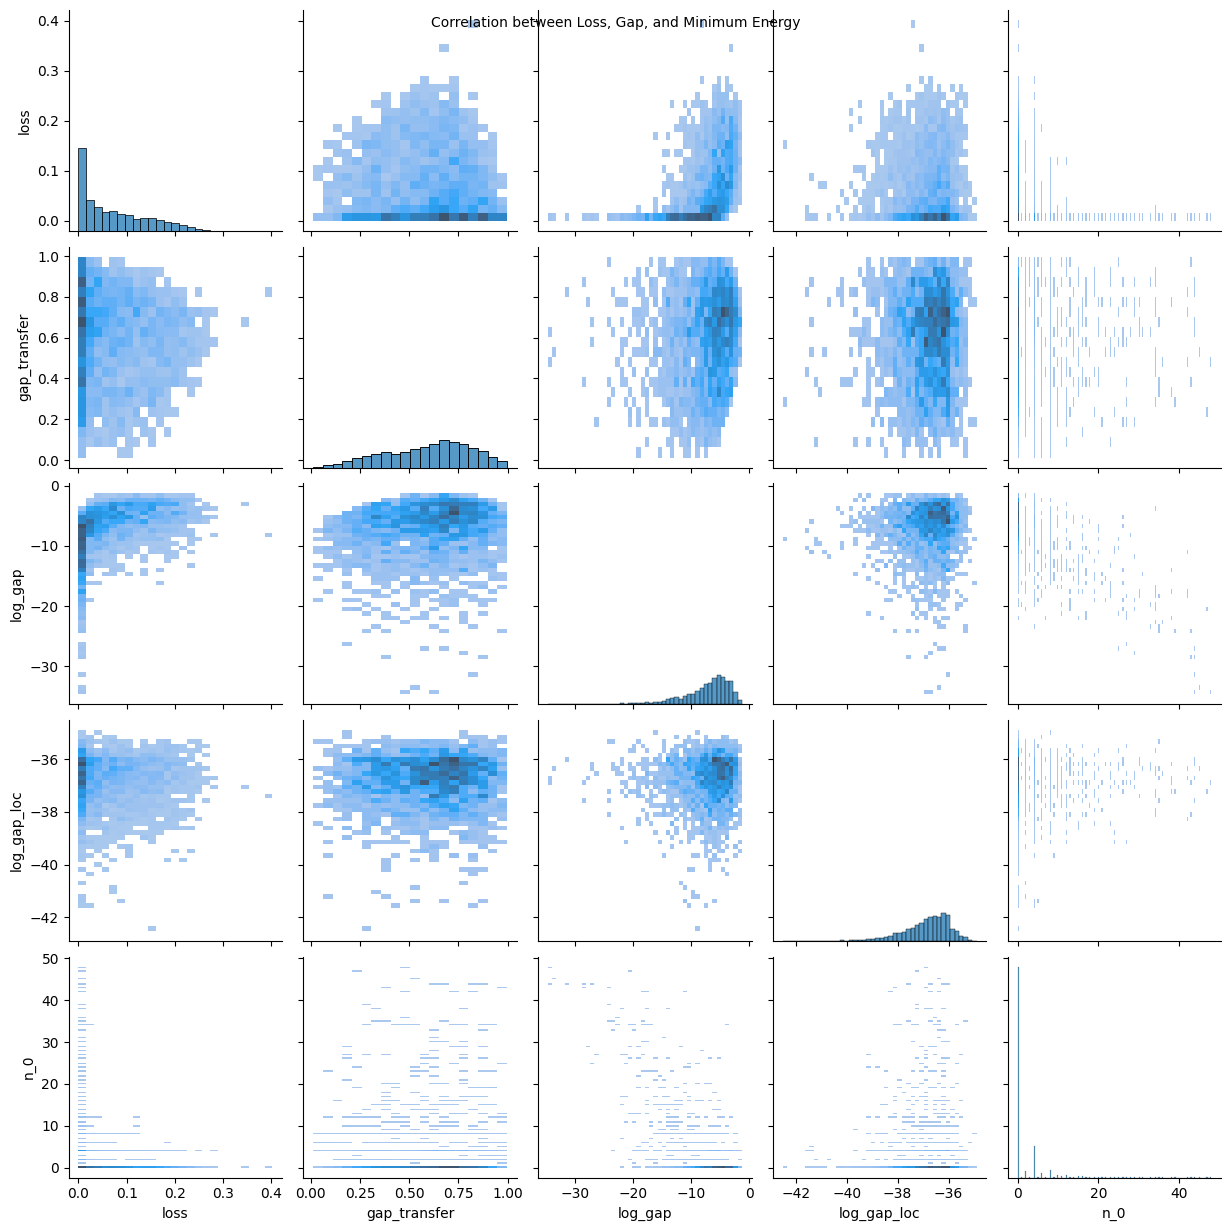

In [4]:
df = pd.DataFrame(res)
df['min_energy'] = df['E'].apply(lambda x: x[1])
df["log_gap"] = df.gap.apply(np.log)
df["log_gap_loc"] = df.gap_loc.apply(np.log)
df["log_loss"] = df.loss.apply(lambda x: np.log(x+0.0001))
# Create a pairplot to visualize the correlations between loss, gap, and minimum energy.
sns.pairplot(df[['loss', 'gap_transfer', "log_gap", "log_gap_loc", "n_0"]] , kind='hist')

# Set titles and labels.
plt.suptitle('Correlation between Loss, Gap, and Minimum Energy', size=10)
plt.show()

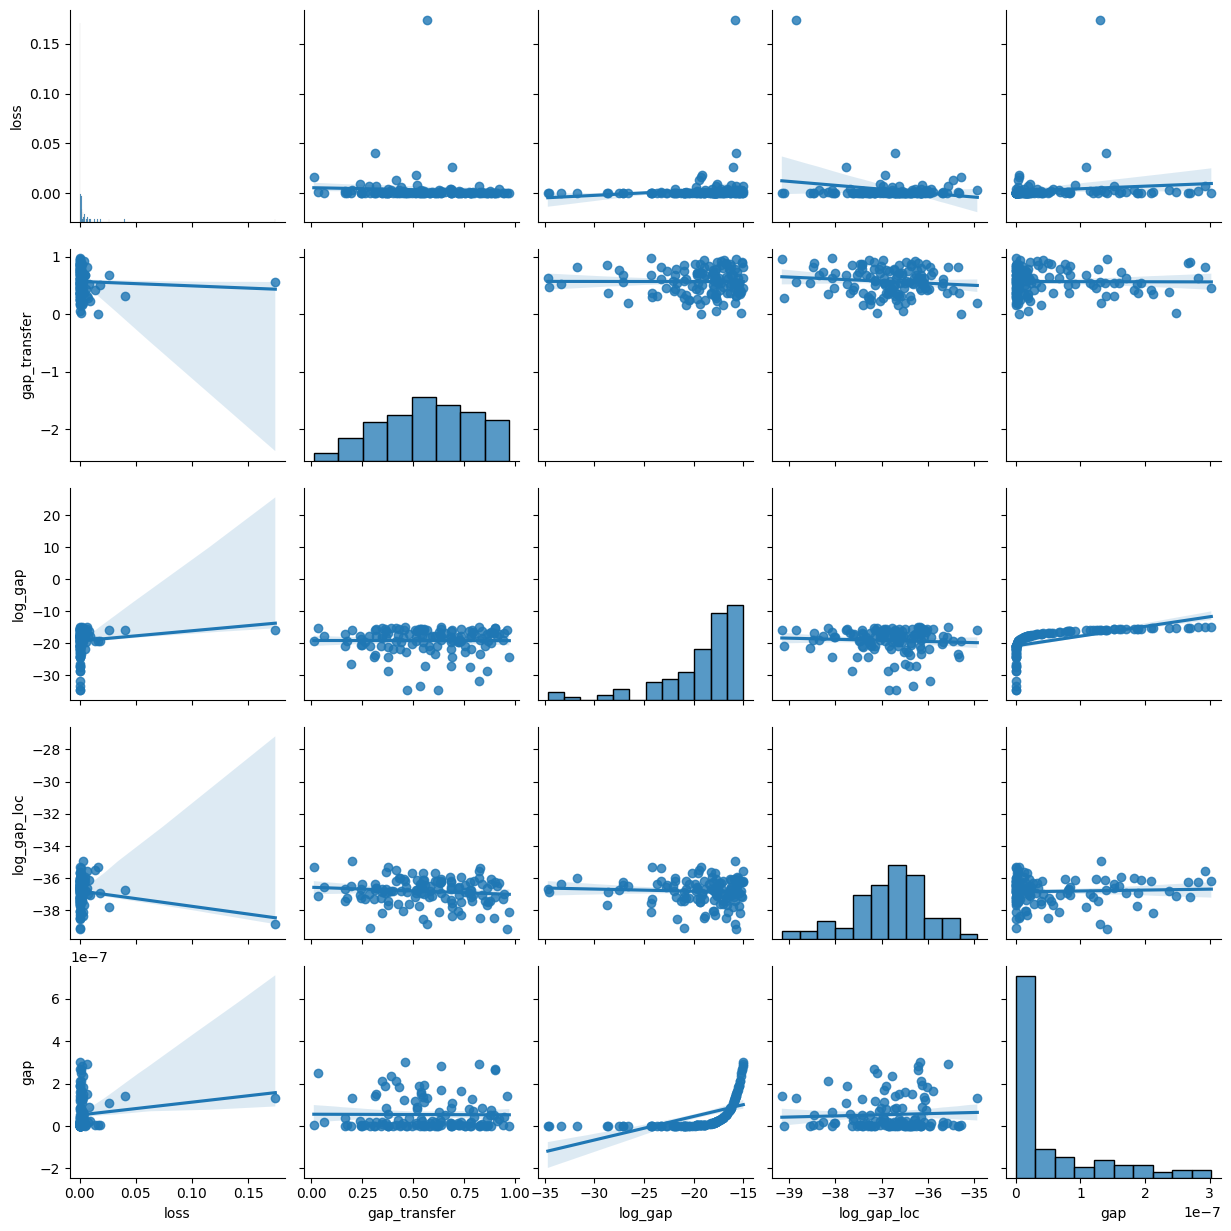

In [5]:
sns.pairplot(df[df.log_gap < -15][['loss', 'gap_transfer', "log_gap", "log_gap_loc", "gap"]] , kind='reg' , diag_kind="hist")

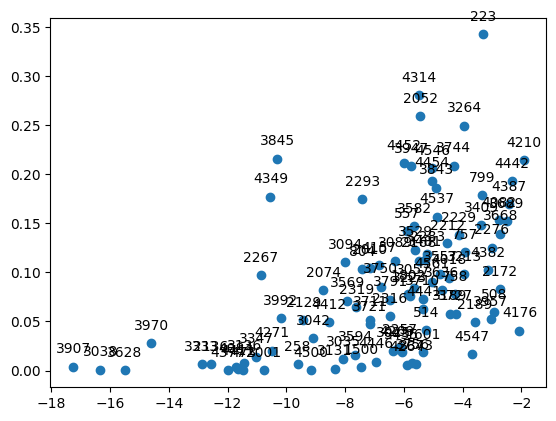

In [6]:
import matplotlib.pyplot as plt
sample_df = df.sample(n=100, random_state=1)
plt.scatter(sample_df['log_gap'], sample_df['loss'])  # Plot each point
for i in range(len(sample_df)):
    plt.annotate(sample_df['seed'].iloc[i],  # This is the text to display
                 (sample_df['log_gap'].iloc[i], sample_df['loss'].iloc[i]),  # This is the point to which the text is annotated
                 textcoords="offset points",  # how to position the text
                 xytext=(0,10),  # distance from text to points (x,y)
                 ha='center')  # horizontal alignment can be left, right or center
plt.
plt.show()

## AKLT

In [74]:
A = np.zeros((3, 2, 2))
A[0][1,0] = -1/np.sqrt(2)
A[2][0,1] = 1/np.sqrt(2)
A[1][0,0] = 1/2
A[1][1,1] = -1/2
A = A.transpose(1,0,2)
A = get_canonical_form(A)
A_ = A.transpose(1,0,2)
A_tilde = np.einsum("ijk,ilm->jlkm", A_, A_).reshape(4,4)
sle = np.sort(np.linalg.eigvals(A_tilde))[::-1]
A2 = np.einsum("ijk,klm->jlim", A, A).reshape(sps**2, bd**2)
U, s , V = np.linalg.svd(A2)
Up = U[:, len(s):]
h = Up @ Up.T
L = 5
H = sum_ham(h, [[i, (i+1)%L] for i in range(L)], L, 3)
E = np.linalg.eigvalsh(H)

In [75]:
E

array([-6.37284975e-15,  4.53956599e-01,  4.53956599e-01,  4.53956599e-01,
        4.53956599e-01,  4.53956599e-01,  4.53956599e-01,  1.05436027e+00,
        1.05436027e+00,  1.05436027e+00,  1.07857402e+00,  1.07857402e+00,
        1.07857402e+00,  1.07857402e+00,  1.07857402e+00,  1.07857402e+00,
        1.07857402e+00,  1.07857402e+00,  1.07857402e+00,  1.07857402e+00,
        1.10982994e+00,  1.10982994e+00,  1.10982994e+00,  1.10982994e+00,
        1.10982994e+00,  1.10982994e+00,  1.29398867e+00,  1.29398867e+00,
        1.33333333e+00,  1.33333333e+00,  1.33333333e+00,  1.33333333e+00,
        1.33333333e+00,  1.57391404e+00,  1.57391404e+00,  1.57391404e+00,
        1.57391404e+00,  1.57391404e+00,  1.57391404e+00,  1.63870822e+00,
        1.63870822e+00,  1.63870822e+00,  1.63870822e+00,  1.63870822e+00,
        1.63870822e+00,  1.63870822e+00,  1.63870822e+00,  1.63870822e+00,
        1.63870822e+00,  1.80274667e+00,  1.80274667e+00,  1.80274667e+00,
        1.80274667e+00,  

In [63]:
Sz = np.zeros([3,3])
Sz[0,0] = 1
Sz[2,2] = -1
Sx = np.zeros([3, 3])
Sx[1,0] = Sx[0,1] = Sx[2,1] = Sx[1,2] = 1/np.sqrt(2)
Sy = np.zeros([3, 3], dtype=np.complex64)
Sy[1,0] = Sy[2,1] = 1j/np.sqrt(2)
Sy[0,1] = Sy[1,2] = -1j/np.sqrt(2)


SzSz = np.kron(Sz,Sz).astype(np.float64)
SxSx = np.kron(Sx,Sx).astype(np.float64)
SySy = np.kron(Sy,Sy).astype(np.float64)

lh = SzSz + SxSx + SySy
J = [1, 1/3]
lh = -(lh + lh@lh*J[1]) + 1/3 * np.eye(lh.shape[0])


/var/folders/z7/m5qzz0hj12z06hxsn5km2c400000gn/T/ipykernel_77504/3164056010.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  SySy = np.kron(Sy,Sy).astype(np.float64)


In [72]:
L = 5
H = sum_ham(lh, [[i, (i+1)%L] for i in range(L)], L, 3)
E = np.linalg.eigvalsh(H)

In [73]:
E

array([-5.00000006, -5.00000003, -5.00000003, -4.99999997, -4.99999997,
       -4.99999986, -4.99999986, -4.9999997 , -4.9999997 , -4.9999995 ,
       -4.9999995 , -3.61803396, -3.61803396, -3.61803395, -3.61803395,
       -3.61803395, -3.61803395, -3.6180339 , -3.6180339 , -3.6180339 ,
       -3.6180339 , -3.61803381, -3.61803381, -3.61803381, -3.61803381,
       -3.61803369, -3.61803369, -3.61803369, -3.61803369, -2.76870906,
       -2.76870906, -2.76870905, -2.76870905, -2.76870905, -2.76870905,
       -2.76870902, -2.76870902, -2.76870902, -2.76870902, -2.76870897,
       -2.76870897, -2.76870897, -2.76870897, -2.53518368, -2.53518367,
       -2.53518367, -2.53518363, -2.53518363, -2.53518356, -2.53518356,
       -2.17825246, -2.17825246, -2.17825246, -2.17825246, -2.17825245,
       -2.17825245, -2.17825245, -2.17825245, -2.17825245, -2.17825245,
       -1.90473825, -1.90473825, -1.90473824, -1.90473824, -1.90473824,
       -1.90473824, -1.90473822, -1.90473822, -1.90473822, -1.90

### Remove high gapped data
tbd

# Canonical form

## Calculate transfer matrix

In [8]:
# for seed in range(0, 11):
seed = 0
A = FF.block1D(bd, sps, bd, seed=seed)
A_ = A.transpose(1,0,2)
A_tilde_ = np.einsum("ijk,ilm->jlkm", A_, A_)
A_tilde = A_tilde_.reshape(4,4)
e, V = np.linalg.eigh(A_tilde)
rho = e[-1]
A_tilde = A_tilde / rho

e, V = np.linalg.eigh(A_tilde)
x = V[:,-1].reshape(2,2)

e, U = np.linalg.eigh(x)
x_h = U @ np.diag(np.sqrt(e + 0j)) @ U.T
x_h_inv = U @ np.diag(1/np.sqrt(e + 0j)) @ U.T

B = x_h_inv @ A_ @ x_h / np.sqrt(rho) #canonical form
B = B.transpose(1,0,2)


In [9]:
check_cano = np.einsum("jik, lik->jl",B, B)
print("is identity : ",  np.linalg.norm(np.eye(2) - check_cano))

is identity :  2.9373740229761033e-16


### Spectrum must be same for A and B

In [10]:
B_ = B.transpose(1,0,2)
B_tilde_ = np.einsum("ijk,ilm->jlkm", B_, B_).reshape(4,4)
Eb = np.linalg.eigvals(B_tilde_)
Ea = np.linalg.eigvals(A_tilde)
print(np.linalg.norm(Ea.real - Eb.real))
print(Eb[1].real)
print(Ea[1])

2.665835984225005e-16
0.46373257491552144
0.4637325749155212


### aggrigate all second largest eigenvalue and store into dataframe 

### Check both actually return same MPS

In [118]:
mps_nodes, mps_edges = FF.create_MPS(6, A)
for k in range(len(mps_edges)):
    C = tn.contract(mps_edges[k])
y1 = C.tensor.reshape(-1)
y1 /= np.linalg.norm(y1)

mps_nodes, mps_edges = FF.create_MPS(6, B)
for k in range(len(mps_edges)):
    C = tn.contract(mps_edges[k])
y2 = C.tensor.reshape(-1)
y2 /= np.linalg.norm(y2)
print("y1 - y2 : ", np.linalg.norm(y1-y2))

y1 - y2 :  8.987388080934195e-16


In [165]:
Ea, Eb

(array([1.        , 0.46373257, 0.1586023 , 0.12083966]),
 array([1.        +0.j, 0.46373257+0.j, 0.1586023 +0.j, 0.12083966+0.j]))

In [37]:
for key, val in res.items():
    print(f'loss: {val["loss"]}')
    print(f'gap : {val["gap"]}')
    print(f"et : {val['et']}")
    print(f"et2 : {val['et2']}")
    print("\n")

loss: 0.17387
gap : 0.014409947267715335
et : [1.07903285 1.41623274 4.14088113 8.92945925]
et2 : [ 1.16431189  2.00571517 17.14689655 79.73524257]


loss: 0.0
gap : 3.808084226575378e-08
et : [-3.52683104 -2.4892931   3.46655985  5.3265312 ]
et2 : [ 6.19658016 12.01703717 12.43853718 28.37193457]


loss: 2e-05
gap : 3.088894926684373e-08
et : [-1.80583275 -1.69885453  7.63632091  8.15280263]
et2 : [ 2.8861067   3.26103194 58.31339699 66.46819078]


loss: 0.26422
gap : 0.022424657326068447
et : [-3.0497284  -0.4825839   1.14272441  4.25264852]
et2 : [ 0.23288722  1.30581908  9.30084333 18.08501945]


loss: 0.09499
gap : 0.012584317829217564
et : [0.7080587  0.83183422 0.92752041 2.80439502]
et2 : [0.50134713 0.69194816 0.86029412 7.86463145]


loss: 0.06638
gap : 0.00510515577127765
et : [-1.50881426 -0.8815801   0.66147717  6.17440182]
et2 : [ 0.43755205  0.77718348  2.27652046 38.12323784]


loss: 0.027
gap : 0.00046814891419191395
et : [-5.25731758 -2.88693889  2.25853235 12.8175936